## Data

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import plot_partial_dependence as pdp

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Read data
cancer = load_breast_cancer()
print('Feature names:', *cancer.feature_names)
print('\nTarget names:', *cancer.target_names)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,test_size = 0.2, random_state = 0)

Feature names: mean radius mean texture mean perimeter mean area mean smoothness mean compactness mean concavity mean concave points mean symmetry mean fractal dimension radius error texture error perimeter error area error smoothness error compactness error concavity error concave points error symmetry error fractal dimension error worst radius worst texture worst perimeter worst area worst smoothness worst compactness worst concavity worst concave points worst symmetry worst fractal dimension

Target names: malignant benign


## Decision tree

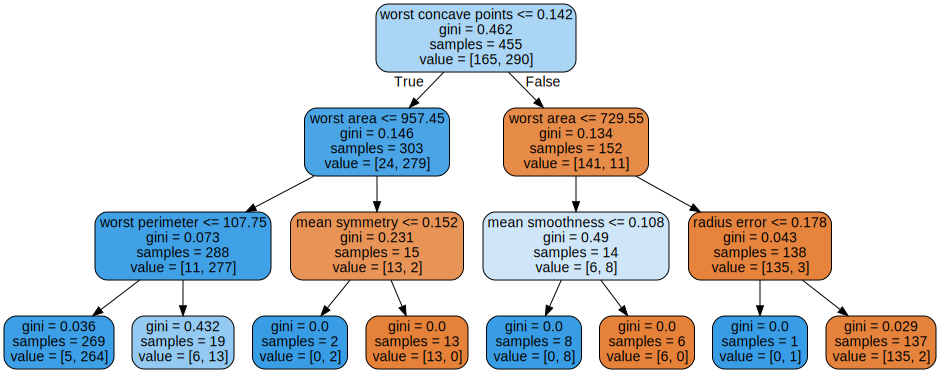

In [ ]:
# Decision tree
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train, y_train)
dot_graph = export_graphviz(
        dt,
        out_file=None, 
        feature_names=cancer.feature_names,
        rounded=True,
        filled=True
    )
tree_graph = graphviz.Source(dot_graph)
tree_graph

In [ ]:
# Decision tree accuracy
print('Training accuracy of decision tree:', accuracy_score(y_train, dt.predict(x_train)).round(4))
print('Testing accuracy of decision tree:', accuracy_score(y_test, dt.predict(x_test)).round(4))

Training accuracy of decision tree: 0.9714
Testing accuracy of decision tree: 0.9649


## Random forest

In [ ]:
# Random forest
rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0)
rf.fit(x_train, y_train)
print('Training accuracy of random forest:', accuracy_score(y_train, rf.predict(x_train)).round(4))
print('Testing accuracy of random forest:', accuracy_score(y_test, rf.predict(x_test)).round(4))

Training accuracy of random forest: 1.0
Testing accuracy of random forest: 0.9649


In [ ]:
# Gradient boosting
gb = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.1, random_state=0)
gb.fit(x_train, y_train)
print('Training accuracy of gradient boosting:', accuracy_score(y_train, gb.predict(x_train)).round(4))
print('Testing accuracy of gradient boosting:', accuracy_score(y_test, gb.predict(x_test)).round(4))


Training accuracy of gradient boosting: 1.0
Testing accuracy of gradient boosting: 0.9649


## Linear SVC

In [ ]:
# Linear SVC
linSVC = LinearSVC(max_iter=1e7)
linSVC.fit(x_train,y_train)
print('Training accuracy of linear SVC:', accuracy_score(y_train, linSVC.predict(x_train)).round(4))
print('Testing accuracy of linear SVC:', accuracy_score(y_test, linSVC.predict(x_test)).round(4))

Training accuracy of linear SVC: 0.967
Testing accuracy of linear SVC: 0.9561


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
# SVC with RBF kernels
rbfSVC = SVC(gamma='auto')
rbfSVC.fit(x_train,y_train)
print('Training accuracy of SVC with RBF kernels:', accuracy_score(y_train, rbfSVC.predict(x_train)).round(4))
print('Testing accuracy of SVC with RBF kernels:', accuracy_score(y_test, rbfSVC.predict(x_test)).round(4))

Training accuracy of SVC with RBF kernels: 1.0
Testing accuracy of SVC with RBF kernels: 0.5877


## Neural network

In [ ]:
# Neural network with two hidden layers of [40, 40] nodes
mlp = MLPClassifier(hidden_layer_sizes=[40,40], activation="relu", max_iter=2000, 
                    solver='adam', learning_rate_init=0.001, random_state=0)
mlp.fit(x_train, y_train)
print('Training accuracy of neural network:', accuracy_score(y_train, mlp.predict(x_train)).round(4))
print('Testing accuracy of neural network:', accuracy_score(y_test, mlp.predict(x_test)).round(4))

Training accuracy of neural network: 0.9209
Testing accuracy of neural network: 0.9035


## Model Performance
It is found that random forest has the highest testing accuracy. 

In [ ]:
# Variable importance
perm = PermutationImportance(rf).fit(x_train, y_train)
eli5.show_weights(perm, feature_names=cancer.feature_names)

Weight,Feature
0.0018 ± 0.0018,worst concave points
0.0018 ± 0.0018,mean texture
0.0013 ± 0.0022,area error
0.0013 ± 0.0022,worst texture
0.0009 ± 0.0022,worst area
0 ± 0.0000,worst compactness
0 ± 0.0000,mean area
0 ± 0.0000,mean smoothness
0 ± 0.0000,mean compactness
0 ± 0.0000,mean concavity


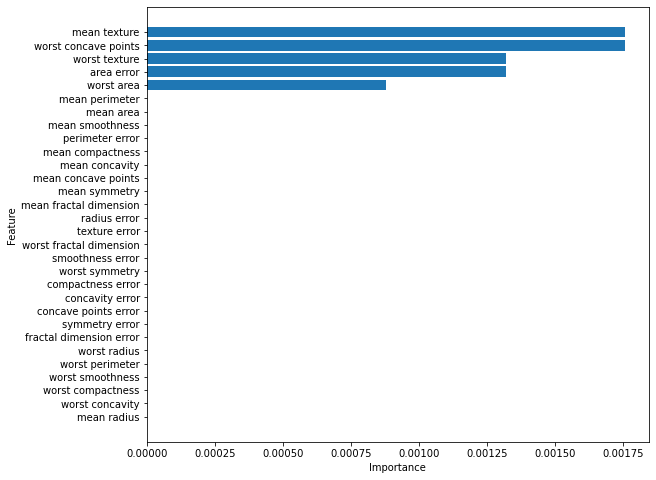

In [ ]:
# importance in decreasing order
imp_ord = np.argsort(perm.feature_importances_)

plt.figure(figsize=(9,8))
yaxis = np.arange(len(perm.feature_importances_))*1
plt.barh(y = yaxis,width = perm.feature_importances_[imp_ord])
plt.yticks(yaxis,cancer.feature_names[imp_ord])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/inspection/_plot/partial_dependence.py:321: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


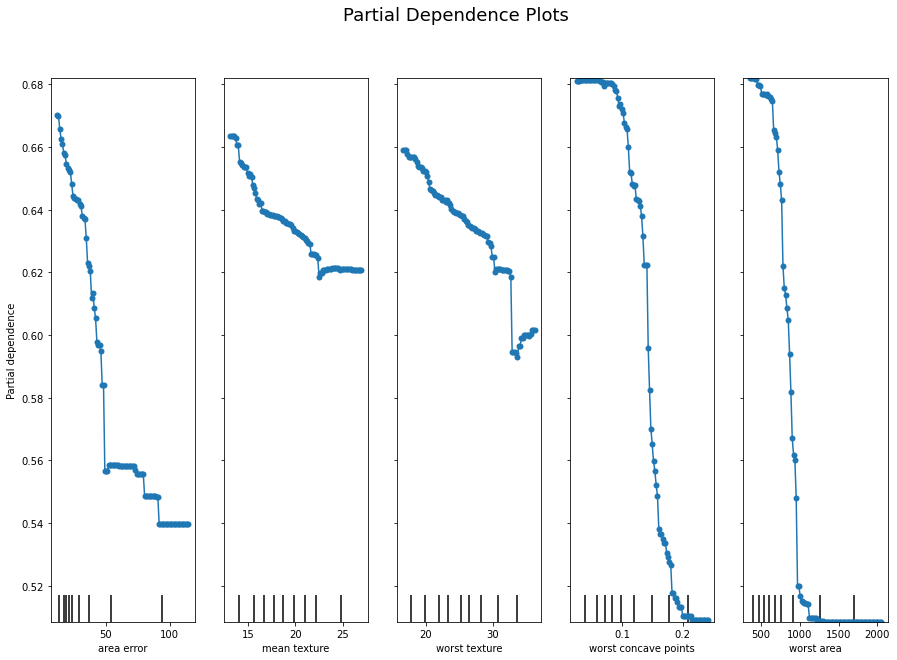

In [ ]:
# Partial dependence plot
# Select the top 5 important features
top5_name = ['area error', 'mean texture', 'worst texture', 'worst concave points', 'worst area']
top5_index = (cancer.feature_names[:, None] == top5_name).argmax(axis=0)
fig = plt.figure(figsize=(15, 10))
pdp(rf, x_train, features=top5_index, feature_names=cancer.feature_names,
    n_cols=5, fig=fig, line_kw={'marker': 'o', 'markeredgecolor': 'None'})
plt.suptitle('Partial Dependence Plots', fontsize=18)
plt.show()

All of the top 5 most important features in random forest, 'area error', 'mean texture', 'worst texture', 'worst concave points' and 'worst area', should correlate with a malignant tumor intuitively. It is observed that all PDPs above have decreasing functions. Since '0' indicates 'malignant' and '1' indicates 'benign', a decreasing function means that a high value in these features suggests a malignant tumor. Thus, the intuitive meaning of features is supported by PDPs.